In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [34]:
data= pd.read_csv('HR Analytics AV Contest/train_LZdllcl.csv')

In [35]:
test=pd.read_csv('HR Analytics AV Contest/test_2umaH9m.csv')

In [36]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## EDA

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [38]:
data.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

Text(0.5, 1.0, 'Target Variable')

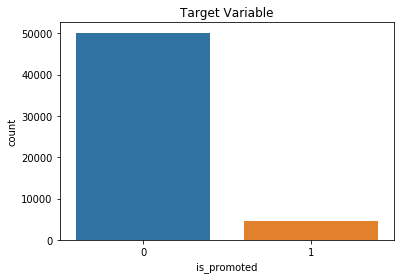

In [39]:
sns.countplot('is_promoted',data=data)
plt.title('Target Variable')

Text(0.5, 1.0, 'Heatmap of Missing Values')

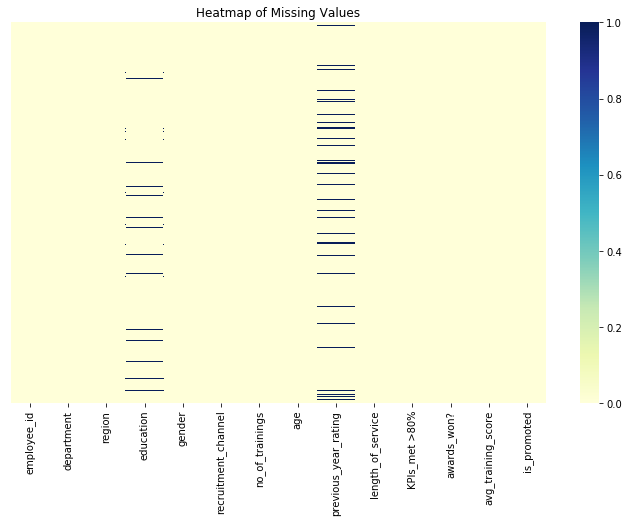

In [40]:
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(),cbar=True,cmap='YlGnBu',yticklabels=False)
plt.title('Heatmap of Missing Values')

In [41]:
data.education.value_counts().index

Index(['Bachelor's', 'Master's & above', 'Below Secondary'], dtype='object')

In [45]:
data.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [11]:
data.iloc[10]

employee_id                  29934
department              Technology
region                   region_23
education                      NaN
gender                           m
recruitment_channel       sourcing
no_of_trainings                  1
age                             30
previous_year_rating           NaN
length_of_service                1
KPIs_met >80%                    0
awards_won?                      0
avg_training_score              77
is_promoted                      0
Name: 10, dtype: object

In [46]:
data[data.education.isnull()]['is_promoted'].value_counts()

0    2287
1     122
Name: is_promoted, dtype: int64

In [47]:
data.education.fillna('Unknown',inplace=True)

In [48]:
test.education.fillna('Unknown',inplace=True)

Text(0.5, 1.0, 'Heatmap of Missing Values')

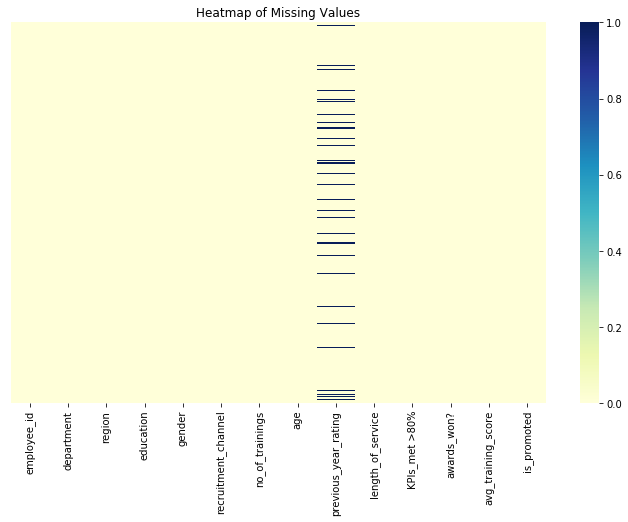

In [50]:
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(),cbar=True,cmap='YlGnBu',yticklabels=False)
plt.title('Heatmap of Missing Values')

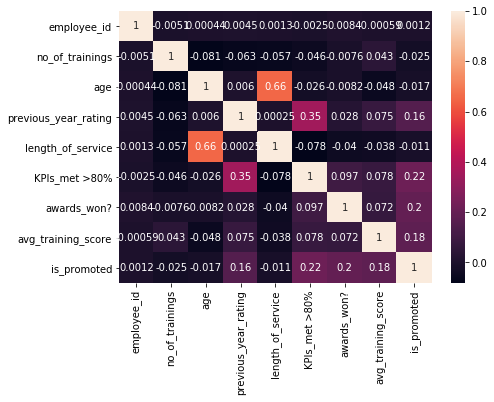

In [49]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot=True)

In [16]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [85]:
data.iloc[10]

employee_id                  29934
department              Technology
region                   region_23
education                  Unknown
gender                           m
recruitment_channel       sourcing
no_of_trainings                  1
age                             30
previous_year_rating             3
length_of_service                1
KPIs_met >80%                    0
awards_won?                      0
avg_training_score              77
is_promoted                      0
Name: 10, dtype: object

In [83]:
data.previous_year_rating.replace(np.NaN,data.previous_year_rating.mode()[0],inplace=True)

In [84]:
test.previous_year_rating.replace(np.NaN,data.previous_year_rating.mode()[0],inplace=True)

In [30]:
data_logit= Data_dummy

In [31]:
from statsmodels.tools import add_constant

In [32]:
data_logit=add_constant(data_logit)

C:\Users\Vimesh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [302]:
import statsmodels.api as sm

In [303]:
logit=sm.Logit(endog=data_logit.is_promoted,exog=data_logit.drop(['is_promoted'],axis=1)).fit()

Optimization terminated successfully.
         Current function value: 0.197051
         Iterations 8


In [304]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:            is_promoted   No. Observations:                54808
Model:                          Logit   Df Residuals:                    54753
Method:                           MLE   Df Model:                           54
Date:                Wed, 18 Sep 2019   Pseudo R-squ.:                  0.3234
Time:                        09:51:40   Log-Likelihood:                -10800.
converged:                       True   LL-Null:                       -15961.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -29.4679      0.496    -59.363      0.000     -30.441     -28.495
no_of_trainings         -0.1479      0.035     -4.204      0.000      -0.217      -0.079
age         

In [259]:
columns=data_logit.columns

In [334]:
x=['is_promoted']

while True:
    for i in logit.pvalues.index:
        if logit.pvalues[i]>0.05:
            logit=sm.Logit(endog=data_logit.is_promoted,exog=data_logit.drop(x,axis=1)).fit()
            x.append(i)
    break


Optimization terminated successfully.
         Current function value: 0.197051
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197072
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197072
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197079
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197082
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197083
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197127
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197139
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197163
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197164
  

In [336]:
logit.pvalues.index

Index(['const', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'Finance', 'HR', 'Legal', 'Operations',
       'Procurement', 'R&D', 'Sales & Marketing', 'Technology',
       'Master's & above', 'Unknown', 'region_17', 'region_2', 'region_22',
       'region_23', 'region_25', 'region_28', 'region_29', 'region_32',
       'region_34', 'region_4', 'region_7', 'region_8', 'region_9'],
      dtype='object')

In [33]:
Data_dummy.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Heatmap of Missing Values')

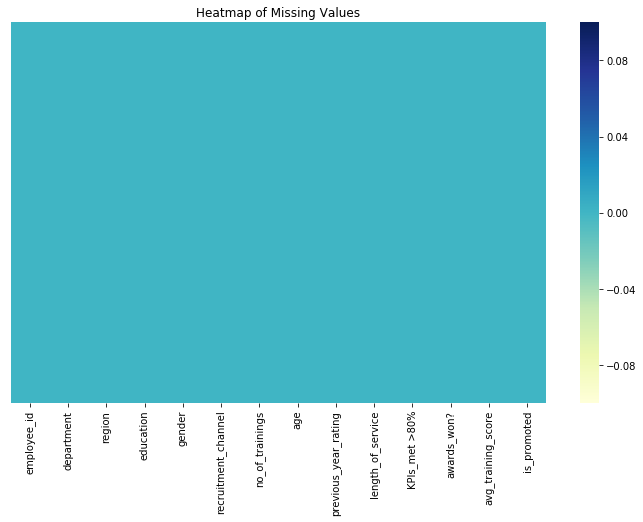

In [86]:
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(),cbar=True,cmap='YlGnBu',yticklabels=False)
plt.title('Heatmap of Missing Values')

 ## Encoding the data

In [87]:
department= pd.get_dummies(data.department,drop_first=True)
recruitment_channel=pd.get_dummies(data.recruitment_channel,drop_first=True)
gender=pd.get_dummies(data.gender,drop_first=True)
education=pd.get_dummies(data.education,drop_first=True)
region=pd.get_dummies(data.region,drop_first=True)

In [88]:
Data_dummy= data.drop(['department','recruitment_channel','gender','education','employee_id','region'],axis=1)

In [89]:
Data_dummy= pd.concat((Data_dummy,department,recruitment_channel,gender,education,region),axis=1)

In [90]:
Data_dummy.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'Finance', 'HR', 'Legal', 'Operations', 'Procurement', 'R&D',
       'Sales & Marketing', 'Technology', 'referred', 'sourcing', 'm',
       'Below Secondary', 'Master's & above', 'Unknown', 'region_10',
       'region_11', 'region_12', 'region_13', 'region_14', 'region_15',
       'region_16', 'region_17', 'region_18', 'region_19', 'region_2',
       'region_20', 'region_21', 'region_22', 'region_23', 'region_24',
       'region_25', 'region_26', 'region_27', 'region_28', 'region_29',
       'region_3', 'region_30', 'region_31', 'region_32', 'region_33',
       'region_34', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9'],
      dtype='object')

In [91]:
department_t= pd.get_dummies(test.department,drop_first=True)
recruitment_channel_t=pd.get_dummies(test.recruitment_channel,drop_first=True)
gender_t=pd.get_dummies(test.gender,drop_first=True)
education_t=pd.get_dummies(test.education,drop_first=True)
region_t=pd.get_dummies(test.region,drop_first=True)

In [92]:
test_dummy= test.drop(['department','recruitment_channel','gender','education','employee_id','region'],axis=1)

In [93]:
test_dummy.shape

(23490, 7)

In [94]:
test_dummy= pd.concat((test_dummy,department_t,recruitment_channel_t,gender_t,education_t,region_t),axis=1)

In [95]:
test_dummy=test_dummy.drop(['Below Secondary','m','sourcing','referred'],axis=1)

In [98]:
test_dummy1=test_dummy[['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'Finance', 'HR', 'Legal', 'Operations',
       'Procurement', 'R&D', 'Sales & Marketing', 'Technology',
       "Master's & above", 'Unknown', 'region_17', 'region_2', 'region_22',
       'region_23', 'region_25', 'region_28', 'region_29', 'region_32',
       'region_34', 'region_4', 'region_7', 'region_9']]

In [96]:
Data_dummy.shape

(54808, 55)

In [97]:
X=Data_dummy[['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'Finance', 'HR', 'Legal', 'Operations',
       'Procurement', 'R&D', 'Sales & Marketing', 'Technology',
       "Master's & above", 'Unknown', 'region_17', 'region_2', 'region_22',
       'region_23', 'region_25', 'region_28', 'region_29', 'region_32',
       'region_34', 'region_4', 'region_7','region_9']]
y=Data_dummy.is_promoted

# Prediction

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf_unsampled=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=42)

In [105]:
rf_unsampled.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [106]:
predicted_rf_uns=rf_unsampled.predict(test_dummy1)

In [107]:
solutions_rf_unsampled=pd.DataFrame({'employee_id':test.employee_id,'is_promoted':predicted_rf_uns})

In [108]:
solutions_rf_unsampled.to_csv('Solution_rf_unsampled.csv',index=False)

## Resampling- NearMiss 

In [109]:
from imblearn.under_sampling import NearMiss

In [110]:
nm=NearMiss()

In [111]:
X_downsampled,y_downsampled=nm.fit_sample(X,y)

In [112]:
np.bincount(y_downsampled)

array([4668, 4668], dtype=int64)

In [113]:
X_downsampled=pd.DataFrame(X_downsampled,columns=X.columns)

## Prediction

In [132]:
rf_sampled= RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=123)

In [133]:
rf_sampled.fit(X_downsampled,y_downsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [134]:
predicted_rf_sampled=rf_sampled.predict(test_dummy1)

In [135]:
solutions_rf_sampled=pd.DataFrame({'employee_id':test.employee_id,'is_promoted':predicted_rf_sampled})

In [136]:
solutions_rf_sampled.to_csv('Solution_rf_sampled.csv',index=False)

## Resampling- SMOTE

In [120]:
from imblearn.over_sampling import SMOTE

In [121]:
smote= SMOTE(ratio='minority',random_state=123)

In [122]:
X_oversampled,y_oversampled= smote.fit_sample(X,y)

In [123]:
np.bincount(y_oversampled)

array([50140, 50140], dtype=int64)

In [124]:
X_oversampled=pd.DataFrame(X_oversampled,columns=X.columns)

## Prediction

In [210]:
from sklearn.linear_model import LogisticRegression

In [137]:
rf_ov=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=0)

In [138]:
rf_ov.fit(X_oversampled,y_oversampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [211]:
lr=LogisticRegression()

In [212]:
lr.fit(X_oversampled,y_oversampled)

C:\Users\Vimesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
predicted_logistic=lr.predict(test_dummy)

In [217]:
solutions_lr_sampled=pd.DataFrame({'employee_id':test.employee_id,'is_promoted':predicted_logistic})

In [218]:
solutions_lr_sampled.to_csv('Solution_lr_sampled.csv',index=False)

In [219]:
rf_osampled=RandomForestClassifier(n_estimators=250,criterion='gini',random_state=0,max_depth=4)

In [220]:
rf_osampled.fit(X_oversampled,y_oversampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [139]:
predicted_rf_osampled=rf_ov.predict(test_dummy1)

In [140]:
solutions_rf_osampled=pd.DataFrame({'employee_id':test.employee_id,'is_promoted':predicted_rf_osampled})
solutions_rf_osampled.to_csv('Solution_rf_osampled.csv',index=False)

## PCA

In [153]:
from sklearn.decomposition import PCA

In [154]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [156]:
pd.DataFrame(pca.explained_variance_,index=X.columns)

,0
no_of_trainings,179.199035
age,67.727582
previous_year_rating,8.929064
length_of_service,1.504659
KPIs_met >80%,0.371490
awards_won?,0.223739
avg_training_score,0.191823
Finance,0.186066
HR,0.163354
Legal,0.131484


In [158]:
pca.fit(test_dummy1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [160]:
X_pca=X[['no_of_trainings','age','previous_year_rating']]

In [161]:
rf_pca=RandomForestClassifier(n_estimators=300, criterion='entropy',random_state=123)

In [162]:
rf_pca.fit(X_pca,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [163]:
predicted_rf_pca=rf_pca.predict(test_dummy1[['no_of_trainings','age','previous_year_rating']])

In [164]:
solutions_rf_pca=pd.DataFrame({'employee_id':test.employee_id,'is_promoted':predicted_rf_pca})
solutions_rf_pca.to_csv('Solution_rf_pca.csv',index=False)

## Gradient Boosting Classifier

In [170]:
from sklearn.ensemble import GradientBoostingClassifier

In [232]:
gbc=GradientBoostingClassifier(n_estimators=1010,learning_rate=0.42,random_state=0,)

In [233]:
gbc.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.42, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1010,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [234]:
predicted_gbc=gbc.predict(test_dummy1)

In [235]:
solutions_gbc=pd.DataFrame({'employee_id':test.employee_id,'is_promoted':predicted_gbc})
solutions_gbc.to_csv('Solution_gbc.csv',index=False)